# лабораторна робота по ИИ

## 1) один нейрон

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [12]:
def neuron(x=[1,7,4,5], y=0.3, delta_error=0.1):     
    
    if len(x)!=4:
        print('error len of x')
        return 
    if type(y) is not float and type(y) is not int:
        print('error y type is uncorrect')
        return 
    if type(delta_error) is not float and type(delta_error) is not int:
        print('error delta_error type is uncorrect')
        return 
    
    
    # initialization var
    x = np.array([1] + x)
    w = np.random.normal(loc=0.1, scale=0.05, size=(len(x), 1))
    df = pd.DataFrame(columns=['w0', 'w1', 'w2', 'w3', 'w4', 'y_predict', 'delta'])
    
    def predict(x_list):
        x_list = np.array([1] + x_list)
        s = np.dot(x_list, w)[0]
        y = activization_function(s)
        return y
    
    while True:
        
        s_m = np.dot(x, w)[0]
        y_m = activization_function(s_m)
        
        delta = abs((y_m - y) / y)
        df = df.append({'w0':w[0][0], 'w1':w[1][0], 'w2':w[2][0], 'w3':w[3][0], 'w4':w[4][0], 'y_predict':y_m, 'delta': delta}, 
                       ignore_index=True)
        
        if delta <= delta_error: 
            return df, predict
        
        eta = y_m*(1-y_m)
        delta_w = eta * (y - y_m) * x
        w = w + delta_w.reshape(len(x), 1)
        

In [13]:
def activization_function(sum_x):
    return 1/(1 + np.exp(-sum_x))

In [14]:
df, prd = neuron()
df[-10:]

,w0,w1,w2,w3,w4,y_predict,delta
3,0.172151,0.106911,-0.038246,-0.003698,0.021699,0.526237,0.754123
4,0.115747,0.050507,-0.433070,-0.229312,-0.260318,0.006156,0.979478
5,0.117545,0.052305,-0.420485,-0.222120,-0.251329,0.007256,0.975814
6,0.119654,0.054414,-0.405724,-0.213686,-0.240786,0.008796,0.970681
7,0.122193,0.056952,-0.387952,-0.203530,-0.228092,0.011084,0.963053
8,0.125360,0.060119,-0.365784,-0.190863,-0.212257,0.014778,0.950741
9,0.129512,0.064272,-0.336716,-0.174252,-0.191494,0.021506,0.928315
10,0.135373,0.070132,-0.295693,-0.150811,-0.162192,0.036314,0.878952
11,0.144601,0.079360,-0.231098,-0.113899,-0.116053,0.080944,0.730186
12,0.160897,0.095656,-0.117026,-0.048715,-0.034573,0.282854,0.057154


In [15]:
prd([2,4,3,7])

0.37659028798191285

## 2) Многослойный перцептрон, алгоритм обратного распространения ошибки 1\*1\*1

In [19]:
def Multilayer_perceptron(x=7, y=0.3, delta_error=0.1):
    if type(x) is not float and type(x) is not int:
        print('error x type is uncorrect')
        return 
    if type(y) is not float and type(y) is not int:
        print('error y type is uncorrect')
        return 
    if type(delta_error) is not float and type(delta_error) is not int:
        print('error delta_error type is uncorrect')
        return 
    
    df = pd.DataFrame(columns=['delta', 'y_pr'])
    w12, w23 = np.random.normal(loc=0.1, scale=0.05, size=2)
    
    def predict(x_pr):
        x_s1 = x_pr * w12
        y = activization_function(x_s1)
        
        x_s2 = y * w23
        return activization_function(x_s2)
    
    while True:
        x_sum1 = x * w12
        y2 = activization_function(x_sum1)
        
        x_sum2 = y2 * w23
        y3 = activization_function(x_sum2)
        
        delta = abs((y3 - y) / y)
    
        df = df.append({'delta':delta, 'y_pr':y3}, ignore_index=True)
        
        if delta <= delta_error:
            return df, predict
        
        sigma_3 = y3 * (1-y3) * (y - y3)
        delta_w23 = y2 * sigma_3
        
        sigma_2 = y2 * (1-y2) * (sigma_3 * w23)
        delta_w12 = x * sigma_2
        
        w12 += delta_w12
        w23 += delta_w23
        

In [20]:
df, prd = Multilayer_perceptron()
df[-10:]

,delta,y_pr
34,0.149483,0.344845
35,0.142113,0.342634
36,0.135139,0.340542
37,0.128536,0.338561
38,0.122284,0.336685
39,0.116360,0.334908
40,0.110747,0.333224
41,0.105427,0.331628
42,0.100381,0.330114
43,0.095596,0.328679


In [21]:
prd(6.66)

0.33005254955271396

## 3) многослойный песептрон с одним скрытым слоем

In [5]:
def Multilayer_perceptron_2(x=[2,4], y=0.6, hidden_layer=3, w1=[], w2=[]):

    x = [1] + list(x)
    y_hidden = np.array([1] + list(activization_function(np.dot(x, w1))))
    y_predict = activization_function(np.dot(y_hidden, w2))

    d_exit = (y - y_predict)
    delta_exit = y_predict * (1 - y_predict) * d_exit
    delta_hidden = y_hidden * (1 - y_hidden) * (d_exit * w2.reshape(hidden_layer + 1))
    
    for i in range(len(x)):
        w1[i,:] += x[i] * delta_hidden[1:]
    
    w2 += y_hidden.reshape(hidden_layer+1, 1) * delta_exit

    return w1, w2, y_predict
        
        

In [16]:
def online_perceptron(x_list=[[0,0],[1,2],[1,1],[2,1],[2,2],[3,0],[1,0]], 
                      y_list=[0.0, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1], 
                     count_iter=1000):
    
    hidden_layer = 3
    exit_layer = 1

    w1 = np.random.normal(loc=0.1, scale=0.05, size=(len(x_list[0]) + 1, hidden_layer))
    w2 = np.random.normal(loc=0.1, scale=0.05, size=(hidden_layer + 1, exit_layer))
    
    df = pd.DataFrame(columns=['x1', 'x2', 'y_pr'])


    def predict(x_pr):
        y_h = np.array([1] + list(activization_function(np.dot([1] + x_pr, w1))))
        return activization_function(np.dot(y_h, w2))[0]
    
      for i in range(count_iter):
        for x, y in zip(x_list, y_list):
            x = list(x)
            w1, w2, y_pr = Multilayer_perceptron_2(x=x, y=y, w1=w1, w2=w2, hidden_layer=hidden_layer)
            df = df.append({'x1':x[0], 'x2':x[1], 'y_pr':y_pr}, ignore_index=True)
            
            
    return predict, df

In [20]:
def Multilayer_perceptron_3(x=[2,4], y=0.6, delta_error=0.01 ,hidden_layer=3, exit_layer=1, w1=[], w2=[]):

    w1 = np.random.normal(loc=0.1, scale=0.05, size=(len(x) + 1, hidden_layer))
    w2 = np.random.normal(loc=0.1, scale=0.05, size=(hidden_layer + 1, exit_layer))
    
    x = [1] + list(x)
    df = pd.DataFrame(columns=['delta', 'y_pr'])
    
    def predict(x_pr):
        y_h = np.array([1] + list(activization_function(np.dot([1] + x_pr, w1))))
        return activization_function(np.dot(y_h, w2))[0]
    

    while True:

        y_hidden = np.array([1] + list(activization_function(np.dot(x, w1))))
        y_predict = activization_function(np.dot(y_hidden, w2))
        
        delta = abs((y_predict - y) / y)
        
        df = df.append({'delta':delta, 'y_pr':y_predict}, ignore_index=True)
        
        if delta <= delta_error:
            return predict, df

        d_exit = (y - y_predict)
        delta_exit = y_predict * (1 - y_predict) * d_exit
        delta_hidden = y_hidden * (1 - y_hidden) * (d_exit * w2.reshape(hidden_layer + 1))

        for i in range(len(x)):
            w1[i,:] += x[i] * delta_hidden[1:]

        w2 += y_hidden.reshape(hidden_layer+1, 1) * delta_exit


In [22]:
pr, df = Multilayer_perceptron_3()
print(pr([2,4]))
df[-10:]

0.5940490661558847


,delta,y_pr
0,[0.023397127435178154],[0.5859617235388931]
1,[0.019715770377362423],[0.5881705377735825]
2,[0.01660913348121148],[0.5900345199112731]
3,[0.013988904003653935],[0.5916066575978076]
4,[0.011779891433464548],[0.5929320651399212]
5,[0.00991822307352545],[0.5940490661558847]


# debug 





In [17]:
prd, df = online_perceptron()
round(prd([1,0]),1), round(prd([2,1]),2), round(prd([3,0]),1)

(0.1, 0.31, 0.3)

In [18]:
df.iloc[:3*4,:]

,x1,x2,y_pr
0,0,0,[0.560353802039901]
1,1,2,[0.4991597631494706]
2,1,1,[0.4730541961930322]
3,2,1,[0.4393551716608629]
4,2,2,[0.4211701200644246]
5,3,0,[0.41963925368460275]
6,1,0,[0.4069398278991924]
7,0,0,[0.3748540697147333]
8,1,2,[0.33019129169588535]
9,1,1,[0.3294811659587209]


In [19]:
df.iloc[-3*4:,:]

,x1,x2,y_pr
6988,1,1,[0.19359463852235573]
6989,2,1,[0.3122216175649477]
6990,2,2,[0.3885954016361209]
6991,3,0,[0.29759335943950965]
6992,1,0,[0.09792596719205415]
6993,0,0,[0.01877840772189724]
6994,1,2,[0.30553358390089014]
6995,1,1,[0.19359977603527576]
6996,2,1,[0.3122120528815813]
6997,2,2,[0.3886086356346366]


In [8]:
round(prd([4,1]),2)

0.43

In [9]:
round(prd([0,0]), 2)

0.02

In [10]:
round(prd([1,3]), 2), round(prd([2,3]), 2), round(prd([6,1]), 2)

(0.4, 0.45, 0.47)

[0.0, 0.0] 0.242963477985384
[0.25, 0.25] 0.42757843262200923
[0.5, 0.5] 0.8634474017218605
[0.75, 0.75] 1.4224477952221366
[1.0, 1.0] 2.002362702400487
[1.25, 1.25] 2.5829242887796444
[1.5, 1.5] 3.1157485966444725
[1.75, 1.75] 3.563550905854602
[2.0, 2.0] 3.9129094878993294


Text(0.5, 1.0, 'predict')

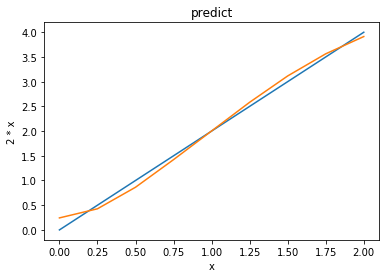

In [11]:
x = np.arange(0,2.25,0.25)
f = x*2
prd, df = online_perceptron([[xi,xi] for xi in x[::2]], f[::2]/10)

f_prd = []
for xi in zip(x,x):
    f_prd.append(prd(list(xi)) * 10)
    print(list(xi), f_prd[-1])    

plt.plot(x, f)
plt.plot(x, f_prd)
plt.xlabel('x')
plt.ylabel('2 * x')
plt.title('predict')